<a href="https://colab.research.google.com/github/victorcba/Estudio/blob/victorcba-RamaEstudio/Practico_Examen_V2_victor_lifata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [13]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [5]:
# Datos
# ==============================================================================
data = load_iris()
data1 = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
datos = data1

#PONER CODIGO AQUI

In [9]:
datos.shape

(150, 5)

In [23]:
datos.rename({'sepal length (cm)': 'sepl', 'sepal width (cm)': 'sepw', 'petal length (cm)': 'petl','petal width (cm)': 'petw'}, axis=1, inplace=True)

In [24]:
datos

,target,sepl,sepw,petl,petw
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2.0,6.7,3.0,5.2,2.3
146,2.0,6.3,2.5,5.0,1.9
147,2.0,6.5,3.0,5.2,2.0
148,2.0,6.2,3.4,5.4,2.3


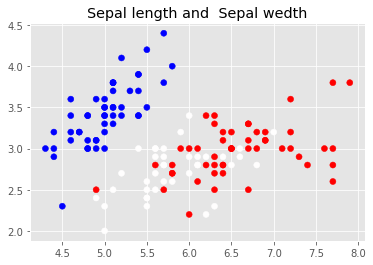

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.sepl, datos.sepw, c=datos.target);
ax.set_title("Sepal length and  Sepal wedth");

In [30]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#PONER CODIGO AQUI



In [38]:
X_train.shape

(120, 4)

In [39]:
X_test.shape

(30, 4)

In [47]:
#Busqueda del mejor hiperparametro
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(),
        'params':{
            'C':[1, 0.75, 0.5, 0.25],
            'kernel':['linear']
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [48]:
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,support vector machine,0.975,"{'C': 1, 'kernel': 'linear'}"


In [43]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 1, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

#PONER CODIGO AQUI


SVC(C=1, kernel='linear', random_state=123)

In [45]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones
#PONER CODIGO AQUI


array([1., 1., 2., 0., 1., 0., 0., 0., 1., 2., 1., 0., 2., 1., 0., 1., 2.,
       0., 2., 1., 1., 1., 1., 1., 2., 0., 2., 1., 2., 0.])

In [46]:
# Accuracy de test del modelo 
# ==============================================================================

#PONER CODIGO AQUI
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 100.0%


In [49]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0.0,1.0,2.0
Real,,,
0.0,9,0,0
1.0,0,13,0
2.0,0,0,8


--------------------------------------------------------------------------------

Regresion logistica Multiple

In [50]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix #fuera de uso
from sklearn.metrics import ConfusionMatrixDisplay #hay que usar esta

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Datos
# ==============================================================================
datos_Regresion = datos
datos_Regresion 

,target,sepl,sepw,petl,petw
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2.0,6.7,3.0,5.2,2.3
146,2.0,6.3,2.5,5.0,1.9
147,2.0,6.5,3.0,5.2,2.0
148,2.0,6.2,3.4,5.4,2.3


In [53]:
#Dividimos los datos
X = datos_Regresion.drop(columns = 'target')
y = datos_Regresion['target']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=42)

In [54]:
X_train.shape

(120, 4)

In [55]:
X_test.shape

(30, 4)

In [56]:
#Normalizamos el dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalizado = min_max_scaler.fit_transform(X_train)
X_test_normalizado = min_max_scaler.fit_transform(X_test)

In [ ]:
X_train_normalizado


In [ ]:
X_test_normalizado

In [59]:
#Entrenamos el modelo
reglog=LogisticRegression()

reglog.max_iter=100
reglog.fit(X_train_normalizado, y_train)

LogisticRegression()

In [60]:
#Hacemos la predicción sobre los datos de testeo
predict = reglog.predict(X_test_normalizado)
predict

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 2., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [61]:
#Verificamos que tan acertada fue la respuesta del modelo
accuracy_RL = accuracy_score(y_test, predict)
accuracy_RL
print("")
print(f"El accuracy de test es: {100*accuracy_RL}%")


El accuracy de test es: 96.66666666666667%


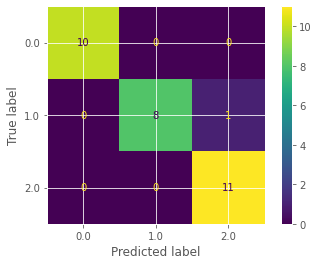

In [62]:
#Imprimimos la matriz de confusión
ConfusionMatrixDisplay.from_predictions(
   y_test, predict)

plt.show()